Classification with K Nearest Neighbors
---

KNN-C determines the euclidean distance for any (unlabled) test point from the set of (labeled) training points.

It must recalculate the distances for every single new input (tricks involve setting a maximum radius or using tree code)

- KNN is not considered fast or robust
- but, it is simple to implement and control

---
- Should be larger than number of dimensions to avoid a total split amongst all of the groups
- Should be odd to avoid having an even split between any 2 groups
- Suggestion: good idea to have K > n_odd + 2 or n_even + 1, whre n_odd / n_even = number of groups

---
- Confidence = number of neighbors per test point that is "nearest" of the k-tests
 - for a given test point -- and k = 3 -- if 2 of the nearest neighbors are in group 1, but the third is in group 2, then there is 66% confidence in that test point's labeling

---
With KNN, there is not really a training and testing because KNN is constantly remapping the entire dataset

This is why SVM classification scales MUCH better with larger datasets (size > 1 GB)

---
#  Attribute                     Domain
-- -----------------------------------------
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)


Load Necessary Libraries
--

In [200]:
# from sklearn import datasets
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.externals import joblib

import pandas as pd
import numpy  as np

import cPickle as pickle
import random

import warnings

In [ ]:
warnings.

Load Iris Data Set
---
Because we started this on an airplane, I am using the iris data set not, but will switch to the breast cancer data set when I am able to download it

In [8]:
# iris = datasets.load_iris()

Load Breast Cancer Data Set
---
Because we started this on an airplane, I am using the iris data set not, but will switch to the breast cancer data set when I am able to download it

In [9]:
# USE WHEN YOU HAVE WIFI
filename    = 'breast-cancer-wisconsin.data'
df = pd.read_csv(filename)

Allocate iris data set into a DataFrame

In [10]:
# df = pd.DataFrame([X,y])

Identify missing data with '?' and replace it "inplace" with `-99999`

A lot of real world data sets have a lot of missing data and you don't want to drop that entire data row, only the subset of the row that is 'missing'

Making all '?' (missing data) into -99999 turns that one data point into a strong outlier

For KNN, we might want to turn '?' into 0 instead

We could also use `df.dropna(inplace=True)`, which would delete that row.  Because the BCW data set only has 16 '?', and several hundred rows, we might be okay with just deleting those rows -- testing this would be useful

In [11]:
df.replace('?',-99999, inplace=True)

It's important to identify useless data.  Columns such as "ID" may cause havok on some algorithms. Some algorithms can account for outliers well, but KNN is especially bad at it and will be thrown off my the "ID" column

In [12]:
# # USE WHEN YOU HAVE WIFI
useless = ["ID"]
df.drop(useless, 1, inplace=True)

Identify the features (not 'class') and the targets ('class')
--

In [13]:
target  = ['class']
X   = np.array(df.drop(target,1))
y   = np.array(df[target])

Train - Test Splitting with Ratio = 20%
--

In [14]:
splitRatio    = 0.20
random_state  = 42
X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=splitRatio, random_state=random_state)

Train - Test - Validate Splitting with Ratio = 20%, 20%
--

In [15]:
# X_trainTest, X_validate, y_trainTest, y_validate    = cross_validation.train_test_split(X, y, test_size=splitRatio, random_state=42)
# X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X_trainTest, y_trainTest, test_size=splitRatio, random_state=random_state)

Define Classifier: KNN
--

In [16]:
clf = neighbors.KNeighborsClassifier()

Fit the Classifier with the Train data
--

In [18]:
clf.fit(X_train, y_train)

/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predict from the Test data and Check accuracy
--

In [19]:
predict = clf.predict(X_test)
accuracy= clf.score(X_test, y_test)

print "Accuracy = {0:.2f}%".format(accuracy*100)

Accuracy = 98.57%


A 98.57% accurate prediction is HUGE! Still 1.5% error is noticeble, but for a ML first pass 98.57% is AMAZING!!

Check if adding ID really messes with the results
--

In [20]:
# USE WHEN YOU HAVE WIFI
filename    = 'breast-cancer-wisconsin.data'
df = pd.read_csv(filename)
df.replace('?',-99999, inplace=True)
X   = np.array(df.drop(target,1))
y   = np.array(df[target])
splitRatio    = 0.20
random_state  = 42
X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=splitRatio, random_state=random_state)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print "Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)

Accuracy = 60.71%


/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


THIS IS A HUGE DIFFERENCE!: With "ID" included, our predictions go from 98.57% (AMAZING) to 60.71% (WTF??)

Now back to our regularly scheduled program!

In [21]:
filename    = 'breast-cancer-wisconsin.data'
df = pd.read_csv(filename)
df.replace('?',-99999, inplace=True)

useless = ["ID"]
df.drop(useless, 1, inplace=True)

X   = np.array(df.drop(target,1))
y   = np.array(df[target])

splitRatio    = 0.20
random_state  = 42

X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=splitRatio, random_state=random_state)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print "Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)

Accuracy = 98.57%


/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Save this classifier to a pickle
---

In [22]:
# with open('knn.classification.pickle', 'wb') as f_out:
#     pickle.dump(clf, f_out)
#     f_out.close()
# 
# with open('linearRegression.pickle', 'rb') as f_in:
#     clf_pickle = pickle.load(f_in)
joblib.dump(clf, 'knn.classification.pickle')

['knn.classification.pickle',
 'knn.classification.pickle_01.npy',
 'knn.classification.pickle_02.npy',
 'knn.classification.pickle_03.npy',
 'knn.classification.pickle_04.npy',
 'knn.classification.pickle_05.npy',
 'knn.classification.pickle_06.npy',
 'knn.classification.pickle_07.npy',
 'knn.classification.pickle_08.npy',
 'knn.classification.pickle_09.npy']

Make a prediction

In [23]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1,-1) # Reshape to match shape of X_train

prediction = clf.predict(example_measures)

print "One prediction: ", prediction

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1) # Reshape to match shape of X_train

prediction = clf.predict(example_measures)

print "Two predictions:", prediction

One prediction:  [2]
Two predictions: [2 2]


# NOW We will write our own KNN algorithm!


## Definition of Euclidean Distance

$$ ED = \sqrt{\sum\limits_{i=1}^n \left(q_i - p_i\right)^2}$$

Example: q = (1,3) and p = (2,5): $ED = \sqrt{(1-2)^2 + (3-5)^2}) = \sqrt{1^2 + 2^2} = \sqrt{5}$

In [24]:
from math import sqrt
p1 = (1,3)
p2 = (2,5)

ED = sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
print ED, ED**2

2.2360679775 5.0


Load some more libraries
---

In [25]:
%matplotlib inline
import warnings
from matplotlib import pyplot as plt, style
from collections import Counter

style.use('fivethirtyeight')

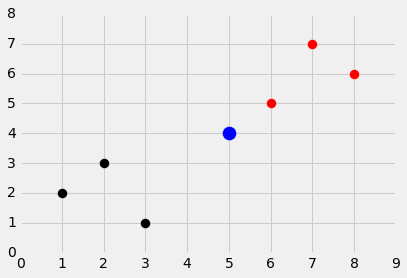

In [38]:
dataset          = {}
dataset['k']     = [[1,2],[2,3],[3,1]]
dataset['r']     = [[6,5],[7,7],[8,6]]

new_features     = [5,7]

# for i in dataset:
#     for ii in dataset[i]:
#         plt.scatter(ii[0], ii[1], s=100, c=i)

[[plt.scatter(ii[0], ii[1], s=100, c=i) for ii in dataset[i]] for i in dataset];
plt.scatter(new_features[0], new_features[1], s=200)

KNN requires us to compute the Euclidean distance between the test point and *EVERY* other point in the data set

In [85]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances   = []
    for group in data:
        for features in data[group]:
            # euclidean_distance  = sqrt((features[0] - predict[0])**2. + (features[1] - predict[1])**2.)
            # euclidean_distance  = np.sqrt(np.sum((np.array(features) - np.array(predict))**2.))
            euclidean_distance  = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes       = [i[1] for i in sorted(distances)[:k]]
    
    # Counter gives a list of a tuple, so [0] gives you the most common list in the tuple, 
    #   then [0] gives you the most common element in that list
    vote_result = Counter(votes).most_common(1)[0][0]
#     print Counter(votes).most_common(1)
    
    return vote_result

In [40]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print result

[('k', 2)]
k


[('r', 3)]


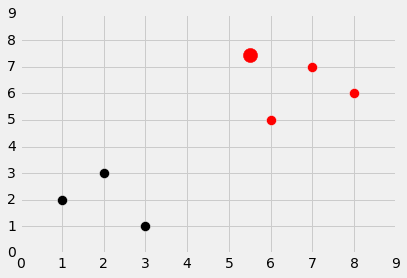

In [58]:
dataset          = {}
dataset['k']     = [[1,2],[2,3],[3,1]]
dataset['r']     = [[6,5],[7,7],[8,6]]

new_features     = np.random.uniform(0,9,2)

result = k_nearest_neighbors(dataset, new_features, k=3)

[[plt.scatter(ii[0], ii[1], s=100, c=i) for ii in dataset[i]] for i in dataset];
plt.scatter(new_features[0], new_features[1], s=200, color=result)

Compare our KNN Classifier accuracy to the SKLearn KNN Classifier
--

In [72]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True) # clean up missing data point

useless = ["ID"]
df.drop(useless, 1, inplace=True)

# convert data to a float to avoid DataFrame mismatching elements (may be redundant)
# probably because the specific column had a '?' string in it originally
full_data = df.astype(float).values.tolist()

# moves data around so that "I" don't know the setup
random.shuffle(full_data)

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]
####################################################################################################
[[9.0, 8.0, 8.0, 5.0, 6.0, 2.0, 4.0, 10.0, 4.0, 4.0], [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 6.0, 9.0, 3.0, 10.0, 10.0, 4.0]]


Segment Data set in Training and Test data sets

In [171]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set  = {2:[], 4:[]}

train_data= full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

Populate the dictionaries

In [172]:
# train_set = [i[-1].append(i[:-1]) for i in train_data]
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

Pass this information to OUR k_nearest_neighbors

In [173]:
correct = 0
total   = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data,k=5) # k = 5 is default for sklearn KNN
        if group == vote:
            correct = correct + 1.0
        total = total + 1.0

Determine OUR accuracy

In [174]:
print 'Accuracy = {0:.2f}'.format(correct / total * 100)

Accuracy = 97.12


Compare to SKLearn KNN-Classifer

In [176]:
filename    = 'breast-cancer-wisconsin.data'
df = pd.read_csv(filename)
df.replace('?',-99999, inplace=True)

useless = ["ID"]
df.drop(useless, 1, inplace=True)

X   = np.array(df.drop(target,1))
y   = np.array(df[target])

splitRatio    = 0.20
random_state  = 42

X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=splitRatio, random_state=random_state)

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print "K=5   Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100) 
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
print "K=10  Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)
clf = neighbors.KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)
print "K=20  Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)
clf = neighbors.KNeighborsClassifier(n_neighbors=50)
clf.fit(X_train, y_train)
print "K=50  Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)
clf = neighbors.KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train, y_train)
print "K=100 Accuracy = {0:.2f}%".format(clf.score(X_test, y_test)*100)

K=5   Accuracy = 98.57%
K=10  Accuracy = 97.86%
K=20  Accuracy = 97.14%
K=50  Accuracy = 95.71%
K=100 Accuracy = 95.71%


/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/p

Adding to K does not necessarily benefit you -- it depends on the size of each class

Add Confidence to Output of Our Personal KNN Classifier
--

In [177]:
def k_nearest_neighbors_withConfidence(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances   = []
    for group in data:
        for features in data[group]:
            # euclidean_distance  = sqrt((features[0] - predict[0])**2. + (features[1] - predict[1])**2.)
            # euclidean_distance  = np.sqrt(np.sum((np.array(features) - np.array(predict))**2.))
            euclidean_distance  = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    votes       = [i[1] for i in sorted(distances)[:k]]
    
    # Counter gives a list of a tuple, so [0] gives you the most common list in the tuple, 
    #   then [0] gives you the most common element in that list
    vote_result = Counter(votes).most_common(1)[0][0]
#     print Counter(votes).most_common(1)
    confidence  = Counter(votes).most_common(1)[0][1] / float(k) # hoping that confidence is 1.0
#     print vote_result, confidence
    return vote_result, confidence

In [182]:
correct = 0
total   = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors_withConfidence(train_set, data,k=5) # k = 5 is default for sklearn KNN
        if group == vote:
            correct = correct + 1.0
        else:
            print group, vote, confidence
        total = total + 1.0

print 'Accuracy = {0:.2f}'.format(correct / total * 100)

2 4 1.0
2 4 0.8
2 4 1.0
2 4 0.8
4 2 1.0
4 2 0.8
4 2 1.0
4 2 0.8
Accuracy = 97.13


Look over the above routines
--

In [191]:
accuracies = []

nIters  = 25
for ii in range(nIters):
    df = pd.read_csv('breast-cancer-wisconsin.data')
    df.replace('?', -99999, inplace=True)
    df.drop(useless, 1, inplace=True)
    
    full_data   = df.astype(float).values.tolist()
    random.shuffle(full_data) # does so in place
    
    test_size   = 0.4
    train_set   = {2:[], 4:[]}
    test_set    = {2:[], 4:[]}
    
    train_data  = full_data[:-int(test_size*len(full_data))]
    test_data   = full_data[-int(test_size*len(full_data)):]
    
    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    
    for i in test_data:
        test_set[i[-1]].append(i[:-1])
    
    correct = 0
    total   = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors_withConfidence(train_set, data, k=5) # k = 5 is default for sklearn KNN
            if group == vote:
                correct = correct + 1.0
            total = total + 1.0
    
    print '{0:d} Accuracy      = {1:.2f}'.format(ii, correct / total * 100)
    accuracies.append(correct / total * 100)

print 'Mean Accuracy = {0:.2f}'.format(sum(accuracies) / float(len(accuracies)))

0 Accuracy      = 98.92
1 Accuracy      = 96.77
2 Accuracy      = 97.85
3 Accuracy      = 96.06
4 Accuracy      = 94.98
5 Accuracy      = 97.85
6 Accuracy      = 96.06
7 Accuracy      = 96.42
8 Accuracy      = 96.06
9 Accuracy      = 96.06
10 Accuracy      = 98.21
11 Accuracy      = 95.34
12 Accuracy      = 96.77
13 Accuracy      = 95.34
14 Accuracy      = 96.06
15 Accuracy      = 97.85
16 Accuracy      = 94.62
17 Accuracy      = 96.77
18 Accuracy      = 96.42
19 Accuracy      = 97.49
20 Accuracy      = 96.77
21 Accuracy      = 96.77
22 Accuracy      = 97.13
23 Accuracy      = 96.06
24 Accuracy      = 96.06
Mean Accuracy = 96.59


Iterate over SKLearn KNN Classifier
--

In [205]:
filename    = 'breast-cancer-wisconsin.data'
df = pd.read_csv(filename)
df.replace('?',-99999, inplace=True)

useless = ["ID"]
df.drop(useless, 1, inplace=True)

X   = np.array(df.drop(target,1))
y   = np.array(df[target])

splitRatio    = 0.20
random_state  = 42

accuracies    = []
for ii in range(200):
    X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X, y, test_size=splitRatio)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
#     print "{0:d}   Accuracy = {1:.2f}%".format(ii, clf.score(X_test, y_test)*100) 
    accuracies.append(clf.score(X_test, y_test)*100)

print "Mean Accuracy = {0:.2f}%".format(np.mean(accuracies))

/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/p

Mean Accuracy = 96.85%


/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/Users/jonathanfraine/anaconda/lib/p